#K-Means Clustering

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import seaborn as sns

from sklearn.cluster import KMeans



from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-50-309361532a0f>:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [96]:
# List of tickers for the top 99 S&P 500 companies
tickers = [
    'AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL', 'GOOG', 'META', 'TSLA', 'BRK.B', 'UNH',
    'JNJ', 'JPM', 'V', 'PG', 'MA', 'HD', 'AVGO', 'MRK', 'PEP', 'KO',
    'ADBE', 'ORCL', 'COST', 'LLY', 'TMO', 'XOM', 'WMT', 'MCD', 'CVX', 'ABT',
    'CSCO', 'NKE', 'MDT', 'DHR', 'CMCSA', 'DIS', 'VZ', 'BMY', 'T', 'IBM',
    'TXN', 'MMM', 'HON', 'SBUX', 'UNP', 'ACN', 'AMGN', 'GS', 'QCOM', 'CAT',
    'INTU', 'LIN', 'UPS', 'LOW', 'AMT', 'SPGI', 'EL', 'NEE', 'NFLX', 'RTX',
    'NOW', 'LMT', 'BLK', 'PM', 'PYPL', 'MS', 'DE', 'C', 'ADI', 'MDLZ',
    'ISRG', 'PLD', 'GILD', 'ZTS', 'BKNG', 'SCHW', 'TGT', 'MO', 'CI', 'SYK',
    'CVS', 'DUK', 'BDX', 'PNC', 'SO', 'BK', 'VRTX', 'ADP', 'REGN', 'ADI',
    'TJX', 'EW', 'MU', 'GM', 'CSX', 'AEP', 'EOG', 'TFC', 'PGR', 'ETN'
]

# Download historical data for the past year
data = yf.download(tickers, period='1y')['Adj Close']

# Calculate daily returns
returns = np.log(data / data.shift(1)) *100

# Calculate average return and standard deviation
avg_return = returns.mean() * 252  # Annualize average return
std_dev = returns.std() * np.sqrt(252)  # Annualize standard deviation

# Create a DataFrame to hold the results
results = pd.DataFrame({
    'Average Return': avg_return,
    'Standard Deviation': std_dev
})


[*********************100%%**********************]  99 of 99 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: YFChartError('%ticker%: No data found, symbol may be delisted')


In [97]:
results.dropna(inplace=True)
results = results.values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

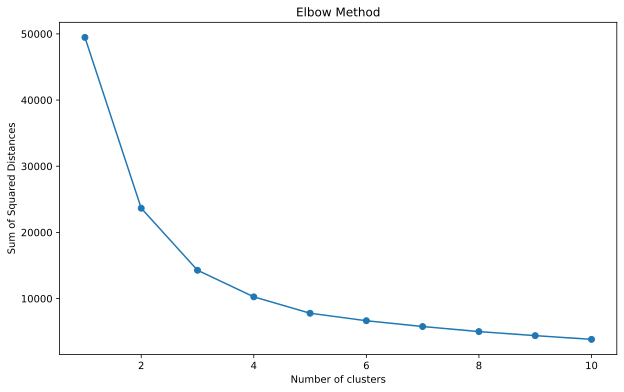

In [98]:
# Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(results)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [99]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(results)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


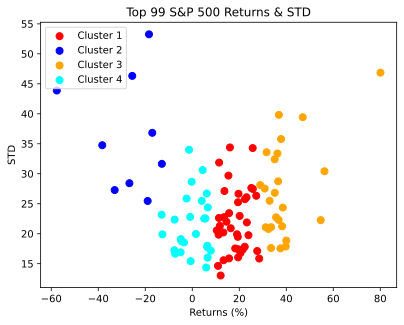

In [100]:
# Visualize the clusters using a scatter
plt.scatter(results[clusters==0, 0], results[clusters==0, 1], s = 50, c='r', label='Cluster 1')
plt.scatter(results[clusters==1, 0], results[clusters==1, 1], s = 50, c='b', label= 'Cluster 2')
plt.scatter(results[clusters==2, 0], results[clusters==2, 1], s = 50, c='orange', label= 'Cluster 3')
plt.scatter(results[clusters==3, 0], results[clusters==3, 1], s = 50, c='cyan', label = 'Cluster 4')

plt.title('Top 99 S&P 500 Returns & STD')
plt.xlabel('Returns (%)')
plt.ylabel('STD')
plt.legend()
plt.show()

In [104]:
# Create a DataFrame to hold the results
results1 = pd.DataFrame({
    'Average Return': avg_return,
    'Standard Deviation': std_dev
})

results1
results1.dropna(inplace=True)

results1['Cluster'] = clusters


In [107]:
results1.describe()

,Average Return,Standard Deviation,Cluster
count,98.000000,98.000000,98.000000
mean,14.511465,24.428337,1.397959
std,21.208915,7.755452,1.249658
min,-57.638054,13.029778,0.000000
25%,4.114779,18.598463,0.000000
50%,15.661939,22.587550,2.000000
75%,28.811297,27.604075,3.000000
max,80.090403,53.254682,3.000000


#Hierarchical Clustering

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import seaborn as sns


import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-122-ba9ab198e398>:15: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [119]:
# List of tickers for the top 99 S&P 500 companies
tickers = [
    'AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL', 'GOOG', 'META', 'TSLA', 'BRK.B', 'UNH',
    'JNJ', 'JPM', 'V', 'PG', 'MA', 'HD', 'AVGO', 'MRK', 'PEP', 'KO',
    'ADBE', 'ORCL', 'COST', 'LLY', 'TMO', 'XOM', 'WMT', 'MCD', 'CVX', 'ABT',
    'CSCO', 'NKE', 'MDT', 'DHR', 'CMCSA', 'DIS', 'VZ', 'BMY', 'T', 'IBM',
    'TXN', 'MMM', 'HON', 'SBUX', 'UNP', 'ACN', 'AMGN', 'GS', 'QCOM', 'CAT',
    'INTU', 'LIN', 'UPS', 'LOW', 'AMT', 'SPGI', 'EL', 'NEE', 'NFLX', 'RTX',
    'NOW', 'LMT', 'BLK', 'PM', 'PYPL', 'MS', 'DE', 'C', 'ADI', 'MDLZ',
    'ISRG', 'PLD', 'GILD', 'ZTS', 'BKNG', 'SCHW', 'TGT', 'MO', 'CI', 'SYK',
    'CVS', 'DUK', 'BDX', 'PNC', 'SO', 'BK', 'VRTX', 'ADP', 'REGN', 'ADI',
    'TJX', 'EW', 'MU', 'GM', 'CSX', 'AEP', 'EOG', 'TFC', 'PGR', 'ETN'
]

# Download historical data for the past year
data = yf.download(tickers, period='1y')['Adj Close']

# Calculate daily returns
returns = np.log(data / data.shift(1)) *100

# Calculate average return and standard deviation
avg_return = returns.mean() * 252  # Annualize average return
std_dev = returns.std() * np.sqrt(252)  # Annualize standard deviation

# Create a DataFrame to hold the results
results = pd.DataFrame({
    'Average Return': avg_return,
    'Standard Deviation': std_dev
})


[*********************100%%**********************]  99 of 99 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: YFChartError('%ticker%: No data found, symbol may be delisted')


In [120]:
results.dropna(inplace=True)
results = results.values

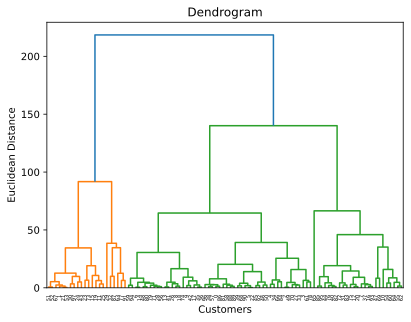

In [121]:
dendrogran = sch.dendrogram(sch.linkage(results, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [123]:
# Perform Hierarchical clustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(results)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


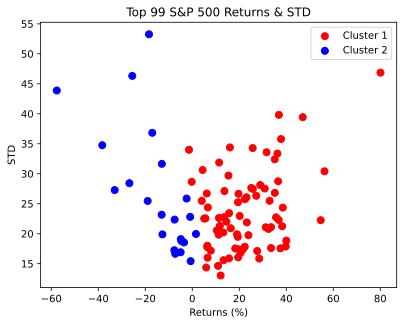

In [127]:
# Visualize the y_hc using a scatter
plt.scatter(results[y_hc==0, 0], results[y_hc==0, 1], s = 50, c='r', label='Cluster 1')
plt.scatter(results[y_hc==1, 0], results[y_hc==1, 1], s = 50, c='b', label= 'Cluster 2')
# plt.scatter(results[y_hc==2, 0], results[y_hc==2, 1], s = 50, c='orange', label= 'Cluster 3')
# plt.scatter(results[y_hc==3, 0], results[y_hc==3, 1], s = 50, c='cyan', label = 'Cluster 4')

plt.title('Top 99 S&P 500 Returns & STD')
plt.xlabel('Returns (%)')
plt.ylabel('STD')
plt.legend()
plt.show()

In [128]:
# Create a DataFrame to hold the results
results1 = pd.DataFrame({
    'Average Return': avg_return,
    'Standard Deviation': std_dev
})

results1
results1.dropna(inplace=True)

results1['Cluster'] = y_hc


In [130]:
results1

,Average Return,Standard Deviation,Cluster
Ticker,,,
AAPL,11.349729,22.624626,0
ABT,-3.505647,18.537036,1
ACN,5.606310,22.550481,0
ADBE,-1.380761,34.000959,0
ADI,13.692456,27.115397,0
...,...,...,...
VRTX,35.661316,22.734327,0
VZ,23.222943,21.878155,0
WMT,27.637824,17.113890,0
